In [55]:
import numpy as np 
import sys 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import time
import random
import os 
from matplotlib import colors as mcolors



In [92]:
def myform(a): 
    return "{:3.1f}".format(a)
def readdata(filename, occupation): 
    unsortdata =  np.loadtxt(filename,comments="#")
    unsortsel = unsortdata[unsortdata[:,4]==occupation]
    if len(unsortsel)==0: sys.exit("no data with the required occupation")
    order = np.lexsort((-unsortsel[:,0], unsortsel[:,4], unsortsel [:,3], unsortsel[:,-1]))    
    data = np.array([unsortsel[i] for i in order ])
    return data[data[:,-1]==0],data[data[:,-1]==1]
top, bottom = readdata("/home/taranto/Documents/dmf2rg_simple/data/tpri_0.080/rawdata_phasediag.dat",0.600)
    

In [128]:
def complot(x,y,col,mark,al,lin,collab = None ):
    plt.plot(x,y,color='black',linestyle=lin)
    if collab is not None: 
        plt.scatter(x,y,marker = mark,color=col,alpha=al,s=40, label = collab,edgecolor = 'black', linewidth=0.6)
    else: 
        plt.scatter(x,y,marker = mark,color=col,alpha=al,s =40, edgecolor = 'black', linewidth=0.6)   
def applyPlotStyle():
    ax.set_xticks(np.arange(0.,1.,0.1))
    ax.set_xticklabels([myform(a) for a in np.arange(0.,1.,0.1)])
    ax.set_xlim(np.min(bottom[-1,0],top[-1,0]),0.6)
    ax.xaxis.grid(linestyle='dashed')
    ax.set_xscale('log')
    ax.legend()
    

0

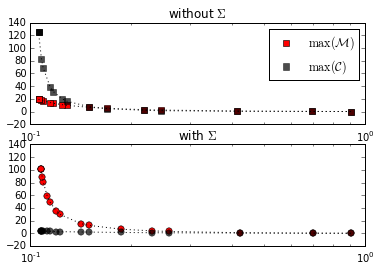

In [141]:
plt.clf()
plt.rcParams['legend.scatterpoints'] = 1
plt.figure(1)
#subfigure 1 : without self energy
ax1=plt.subplot(211) 
complot((top[:,0]),top[:,8],'red','s',1.0,'dotted',collab=r'$\mathrm{max}(\mathcal{M})$')     
complot((top[:,0]),top[:,9],'black','s',0.7,'dotted',collab=r'$\mathrm{max}(\mathcal{C})$')
ax1.set_title('without $\Sigma$')
ax1.set_xticks(np.arange(0.,1.,0.1))
ax1.set_xticklabels([myform(a) for a in np.arange(0.,1.,0.1)])
ax1.set_xlim(np.min(bottom[-1,0],top[-1,0]),0.6)
ax1.xaxis.grid(linestyle='dashed')
ax1.set_ylim([0.,40.])
ax1.set_xscale('log')
ax1.legend()
#subfigure 2 : with self energy 
ax2=plt.subplot(212,sharex=ax1,sharey=ax1)
complot((bottom[:,0]),bottom[:,8],'red','o',1.0,'dotted',collab=r'$\mathrm{max}(\mathcal{M})$')     
complot((bottom[:,0]),bottom[:,9],'black','o',0.7,'dotted',collab=r'$\mathrm{max}(\mathcal{C})$')
ax2.set_title('with $\Sigma$')


namefig = '/home/taranto/Documents/fRG_paper/images/scale_evolution.png'
plt.savefig(namefig)
os.system('geeqie '+namefig+' &')
